In [252]:
import numpy as np
import matplotlib.pyplot as plt
import emcee

# Calculating Evidence and Posterior with pen and paper (only cross checking the solution here)

In [253]:
d=np.array([3,1])
C=np.diag([2,2])
Cinv=np.linalg.inv(C)
detC=np.linalg.det(C)

In [254]:
L=lambda alpha: 1/(2*np.pi*np.sqrt(detC))*np.exp(-0.5*(d-np.array([alpha,alpha]))@(Cinv)@((d-np.array([alpha,alpha]))))

In [255]:
L(0.5)

0.01566973323062664

In [256]:
alpha_min=-100
alpha_max=100
prior_factor=1/(alpha_max-alpha_min)
prior=lambda alpha: (prior_factor if alpha_min<alpha<alpha_max else 0)

In [257]:
unnorm_posterior=lambda alpha: prior(alpha)*L(alpha)

In [258]:
import scipy.integrate

In [259]:
evidence=scipy.integrate.quad(unnorm_posterior,alpha_min,alpha_max)

In [260]:
norm_posterior_in_prior=lambda alpha: prior_factor*L(alpha)/evidence[0]

In [261]:
evidence

(0.0006049268112978593, 6.491211952273402e-11)

In [262]:
ev_anal=1/(alpha_max-alpha_min)/np.sqrt(np.pi)/2/np.sqrt(C[0,0])*np.exp(-(d[0]-d[1])**2/4/C[0,0])

In [263]:
evidence[0]/ev_anal

1.0000000000000013

In [264]:
alpha_arr=np.linspace(0,6,100000)

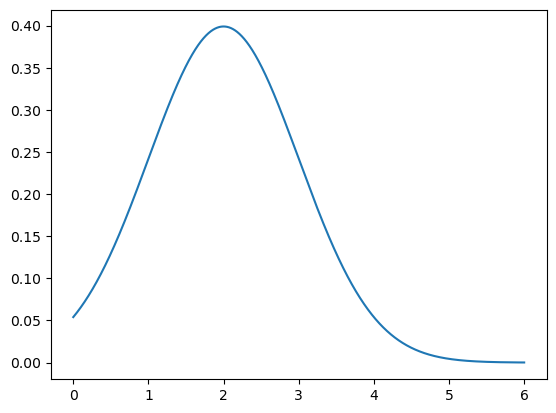

In [265]:
plt.plot(alpha_arr,[norm_posterior_in_prior(alpha) for alpha in alpha_arr])

In [285]:
mean=scipy.integrate.quad(lambda x: x*norm_posterior_in_prior(x),alpha_min,alpha_max)

In [286]:
var=scipy.integrate.quad(lambda x: (x-mean[0])**2*norm_posterior_in_prior(x),alpha_min,alpha_max)

In [287]:
mean

(1.9999999999999973, 1.921807439748957e-13)

In [288]:
std=np.sqrt(var[0])

In [289]:
std

0.9999999999999993

#  Distribution of best-fit $χ^2$

## for the non-linear model in (11)

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import scipy.stats as scistats
chi2dist=scistats.chi2

In [115]:
rng=np.random.default_rng(12345)

In [116]:
C=np.diag([25,25])
Cinv=np.linalg.inv(C)

In [117]:
mu=lambda alpha: np.array([alpha,alpha**2])

In [118]:
alpha_true=0

In [119]:
data=rng.multivariate_normal(mu(alpha_true),C,size=100000)

In [120]:
data.shape

(100000, 2)

In [121]:
chi2=lambda alpha: np.einsum('ijm,jk,ikm->im',data[...,np.newaxis]-mu(alpha)[np.newaxis,...],Cinv,data[...,np.newaxis]-mu(alpha)[np.newaxis,...]) #i: spectrum, jk: covar, m:model par

In [122]:
alpha_arr=np.linspace(-10,10,1000)

In [123]:
chi2surfaces=chi2(alpha_arr)

In [124]:
chi2surfaces.shape

(100000, 1000)

In [125]:
bestfit_chi2s=np.min(chi2surfaces,axis=1)

In [126]:
bestfit_chi2s

array([8.18032042e-01, 6.53874274e-01, 5.53921127e-01, ...,
       3.77204624e-04, 1.14780426e-03, 1.79113483e-01])

In [127]:
np.mean(bestfit_chi2s)

1.1972613821572098

(0.0, 4.0)

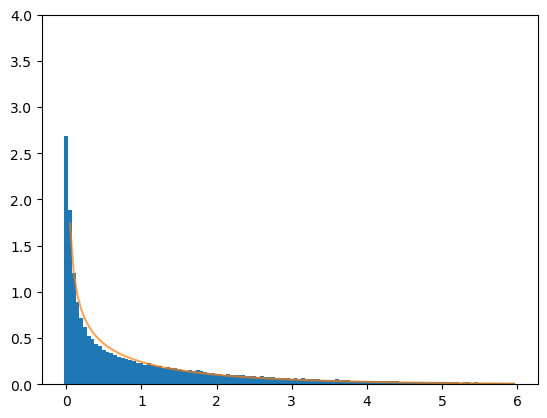

In [128]:
plt.hist(bestfit_chi2s,density=True,bins=np.arange(-0.025,6,0.05))
plt.plot(np.arange(0,6,0.05),chi2dist.pdf(np.arange(0,6,0.05),1),ls='-',alpha=0.7)
plt.ylim(0,4)

## for a linear model in (12)

In [129]:
mu=lambda alpha: np.array([alpha,alpha])

In [130]:
alpha_true=0

In [131]:
data=rng.multivariate_normal(mu(alpha_true),C,size=100000)

In [132]:
data.shape

(100000, 2)

In [133]:
chi2=lambda alpha: np.einsum('ijm,jk,ikm->im',data[...,np.newaxis]-mu(alpha)[np.newaxis,...],Cinv,data[...,np.newaxis]-mu(alpha)[np.newaxis,...]) #i: spectrum, jk: covar, m:model par

In [134]:
alpha_arr=np.linspace(-10,10,1000)

In [135]:
chi2surfaces=chi2(alpha_arr)

In [136]:
chi2surfaces.shape

(100000, 1000)

In [137]:
bestfit_chi2s=np.min(chi2surfaces,axis=1)

In [138]:
bestfit_chi2s

array([0.10051589, 0.74127279, 1.237984  , ..., 0.44305994, 0.06007401,
       1.54652449])

In [139]:
np.mean(bestfit_chi2s)

0.9992324556028281

(0.0, 4.0)

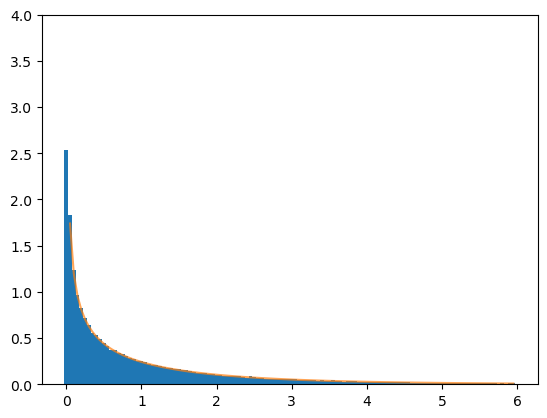

In [140]:
plt.hist(bestfit_chi2s,density=True,bins=np.arange(-0.025,6,0.05))
plt.plot(np.arange(0,6,0.05),chi2dist.pdf(np.arange(0,6,0.05),1),ls='-',alpha=0.7)
plt.ylim(0,4)

In [141]:
mu=lambda alpha: np.array([alpha**2,alpha**2])

In [142]:
alpha_true=0

In [143]:
data=rng.multivariate_normal(mu(alpha_true),C,size=100000)

In [144]:
data.shape

(100000, 2)

In [145]:
chi2=lambda alpha: np.einsum('ijm,jk,ikm->im',data[...,np.newaxis]-mu(alpha)[np.newaxis,...],Cinv,data[...,np.newaxis]-mu(alpha)[np.newaxis,...]) #i: spectrum, jk: covar, m:model par

In [146]:
alpha_arr=np.linspace(-10,10,1000)

In [147]:
chi2surfaces=chi2(alpha_arr)

In [148]:
chi2surfaces.shape

(100000, 1000)

In [149]:
bestfit_chi2s=np.min(chi2surfaces,axis=1)

In [150]:
bestfit_chi2s

array([0.31788225, 0.04063784, 1.50068712, ..., 1.20429707, 3.49964504,
       0.0668751 ])

In [151]:
np.mean(bestfit_chi2s)

1.490670923173814

(0.0, 4.0)

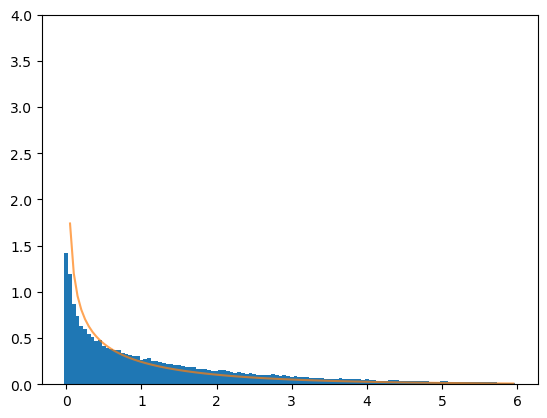

In [152]:
plt.hist(bestfit_chi2s,density=True,bins=np.arange(-0.025,6,0.05))
plt.plot(np.arange(0,6,0.05),chi2dist.pdf(np.arange(0,6,0.05),1),ls='-',alpha=0.7)
plt.ylim(0,4)